In [1]:
def relative_error(A,B):
    if A==B: return 0
    elif B != 0: return 100*abs(A-B)/B
    else: return 100*abs(A-B)/A

## В теории вероятности

Пусть дискретная случайная величина $\xi$ принимает значения $a_1, \dots, a_n$ с вероятнстями $p_1, \dots, p_n$.

Математическим ожданием $\xi$  называется число:
$$
E(\xi) = \sum_{i=1}^n p_i \cdot a_i = 
\begin{pmatrix}
p_1 & p_2 & \dots & p_n
\end{pmatrix}
\begin{pmatrix}
a_1 \\ 
a_2 \\ 
\vdots \\
a_n
\end{pmatrix}
$$

Среднеквадратичным отклонением $\xi$ называется число:
$$
S(\xi) = \sqrt{\sum_{i=1}^n p_i \cdot (a_i - E(\xi))^2} = 
\sqrt{
\begin{pmatrix}
p_1 & p_2 & \dots & p_n
\end{pmatrix}
\begin{pmatrix}
(a_1 - E(\xi))^2\\ 
(a_2 - E(\xi))^2 \\ 
\vdots \\
(a_n - E(\xi))^2
\end{pmatrix}
}
$$

## В статистике

Пусть $x_1, \dots x_n$  - выборка значений случайной величины $\xi$.

Средним значением называется число:
$$
\overline{x} = \frac{1}{n} \sum_{i=1}^nx_i
$$
Среднеквадратичным отклонением называтся число:
$$
S_n = \sqrt{\frac{1}{n} \sum_{i=1}^n(x_i - \overline{x})^2}
$$

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd


def random_variable(A,P,x=None):
    '''
    Получить значение случайной величины (A,P)
    '''
    if x is None:
        x = rnd.random()
    sum = 0
    for i in range(len(P)):
        if sum <= x < sum + P[i]:
            return A[i]
        sum += P[i]

def random_variable_info(A,P):
    expected_value = np.array(P).dot(np.array(A))
    standard_deviation = (np.array(P).dot((np.array(A) - expected_value)**2))**0.5
    return expected_value, standard_deviation
        
def plot_sampling(A,P,N=200):
    '''
    Нарисовать выборку случайной величины (A,P)
    '''
    X = np.arange(N)
    R = np.empty(N)
    for i in X:
        R[i] = random_variable(A,P)
    Rm = R.mean()
    Rs = R.std()
    plt.plot(R,X,'g.');
    plt.plot([Rm]*2, [0,N], linewidth=3);
    plt.plot([Rm + Rs]*2, [0,N], linewidth=3);
    plt.plot([Rm - Rs]*2, [0,N], linewidth=3);
    b = np.arange(max(A) - min(A)+2)-0.5 + min(A)
    plt.hist(R, bins= b)
    plt.show()
    Qm, Qs = random_variable_info(A,P)
    print('Математическое ожидание (точное, по выборке, погрешность): {:.3}, {:.3}, {:.3}% '.format(Qm, Rm, relative_error(Rm,Qm)))
    print('Среднеквадратичное отклонение (точное, по выборке, погрешность): {:.3}, {:.3}, {:.3}% '.format(Qs, Rs, relative_error(Rs,Qs)))
    
    

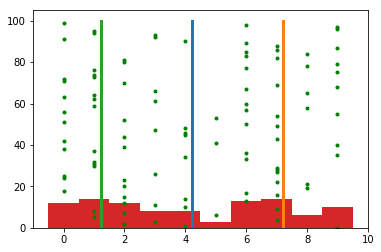

Математическое ожидание (точное, по выборке, погрешность): 4.5, 4.23, 6.0% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.87, 2.99, 4.2% 


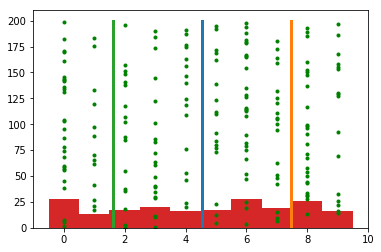

Математическое ожидание (точное, по выборке, погрешность): 4.5, 4.54, 1.0% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.87, 2.92, 1.79% 


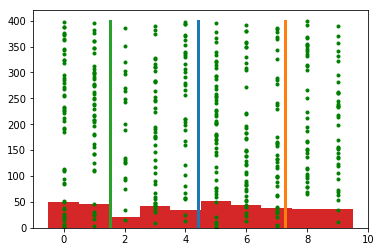

Математическое ожидание (точное, по выборке, погрешность): 4.5, 4.4, 2.17% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.87, 2.88, 0.396% 


In [120]:
N = 10
A = np.arange(N)
P = np.array([1]*N)
P = P / P.sum()
print(A, P, sep="\n")
plot_sampling(A,P,N=100)
plot_sampling(A,P,N=200)
plot_sampling(A,P,N=400)

[0 1 2 3 4 5 6 7 8 9]
[0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667]


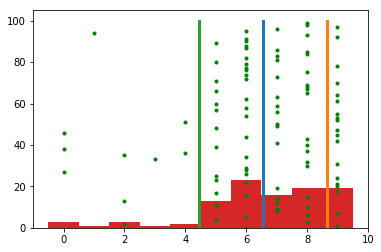

Математическое ожидание (точное, по выборке, погрешность): 6.17, 6.56, 6.38% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.34, 2.1, 10.1% 


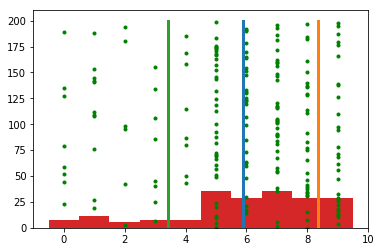

Математическое ожидание (точное, по выборке, погрешность): 6.17, 5.89, 4.49% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.34, 2.46, 5.13% 


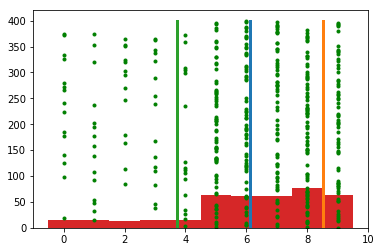

Математическое ожидание (точное, по выборке, погрешность): 6.17, 6.12, 0.838% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.34, 2.41, 2.88% 


In [123]:
N = 10
A = np.arange(N)
P = np.array(([1]*(N//2)) +  ([5]*(N//2)))
P = P / P.sum()
print(A, P, sep="\n")
plot_sampling(A,P,N=100)
plot_sampling(A,P,N=200)
plot_sampling(A,P,N=400)

[0 1 2 3 4 5 6 7 8 9]
[0.         0.02222222 0.04444444 0.06666667 0.08888889 0.11111111
 0.13333333 0.15555556 0.17777778 0.2       ]


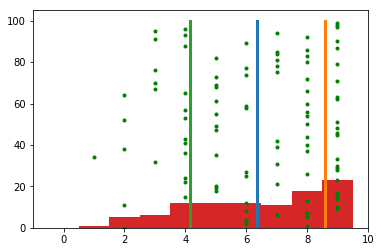

Математическое ожидание (точное, по выборке, погрешность): 6.33, 6.37, 0.579% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.21, 2.23, 0.655% 


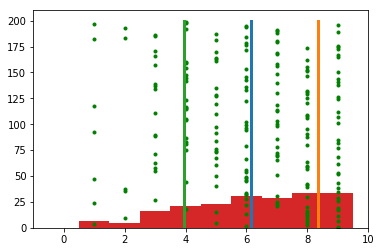

Математическое ожидание (точное, по выборке, погрешность): 6.33, 6.16, 2.82% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.21, 2.2, 0.286% 


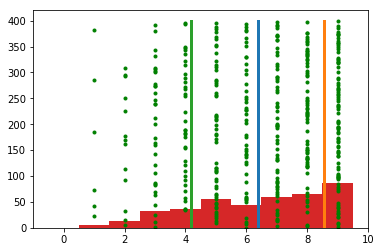

Математическое ожидание (точное, по выборке, погрешность): 6.33, 6.37, 0.579% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 2.21, 2.18, 1.5% 


In [124]:
N = 10
A = np.arange(N)
P = np.array([i for i in range(N)])
P = P / P.sum()
print(A, P, sep="\n")
plot_sampling(A,P,N=100)
plot_sampling(A,P,N=200)
plot_sampling(A,P,N=400)

## Задание 
Создание распределение вероятностей случайной величины $\xi$ "лесенкой": cлучайная величина принимает $\xi$ значения из множества $\{1,2,3,4\}$, при этом 
$$2 \cdot P( \xi = i) = P( \xi = (i+1)), \ \ i=1,2,3$$.


[1 2 3 4]
[0.03333333 0.13333333 0.3        0.53333333]


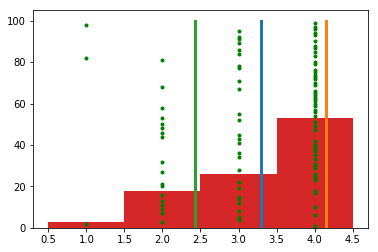

Математическое ожидание (точное, по выборке, погрешность): 3.33, 3.29, 1.3% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 0.83, 0.864, 4.06% 


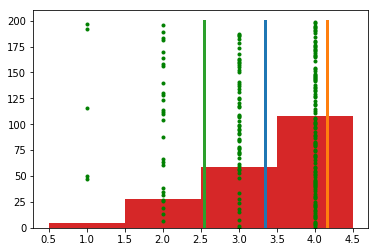

Математическое ожидание (точное, по выборке, погрешность): 3.33, 3.35, 0.5% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 0.83, 0.811, 2.3% 


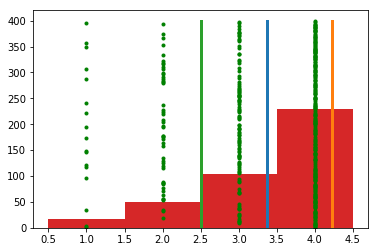

Математическое ожидание (точное, по выборке, погрешность): 3.33, 3.37, 1.03% 
Среднеквадратичное отклонение (точное, по выборке, погрешность): 0.83, 0.856, 3.11% 


In [130]:
N = 4
A = np.arange(1,N+1)
P = np.array([i**2 for i in range(1,N+1)])
P = P / P.sum()
print(A, P, sep="\n")
plot_sampling(A,P,N=100)
plot_sampling(A,P,N=200)
plot_sampling(A,P,N=400)

## Зависимые случайные величины

In [147]:
def get_dependent_samplings(A1,P1, A2, P2, I, U=1000):
    '''
    I - множество интервалов, на которых функции независимы
    '''
    X = np.arange(U)
    R1 = np.empty(U)
    R2 = np.empty(U)
    for i in X:
        x = rnd.random()
        R1[i] = random_variable(A1,P1,x)
        for interval in I:
            if interval[0] <= x < interval[1]: 
                x = rnd.random()
        R2[i] = random_variable(A2,P2,x)            
    return R1, R2
    
def plot_two_samplings(R1,R2):
    plt.plot(R1, R2, '.');
    plt.show();
    cov = (R1 - R1.mean()).dot(R2 - R2.mean())/len(R1)
    print("Ковариация: ",cov)

In [174]:
N = 100
A1 = np.arange(N)
P1 = np.array([1]*N)
P1 = P1 / P1.sum()

A2 = np.arange(N-1, -1, -1)
P2 = P1

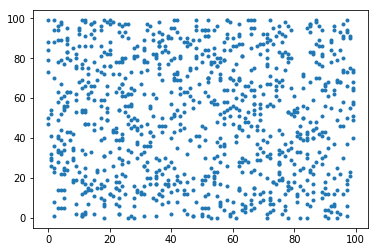

Ковариация:  -18.004045999999995


In [175]:
I = [[0,1]]
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,I)
plot_two_samplings(R1,R2)

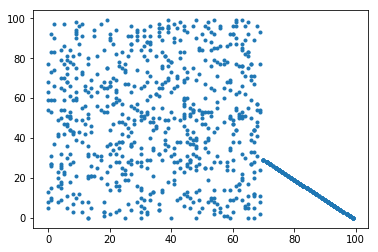

Ковариация:  -387.790428


In [176]:
I = [[0,0.7]]
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,I)
plot_two_samplings(R1,R2)

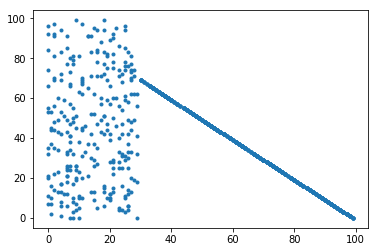

Ковариация:  -399.778952


In [177]:
I = [[0,0.3]]
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,I)
plot_two_samplings(R1,R2)

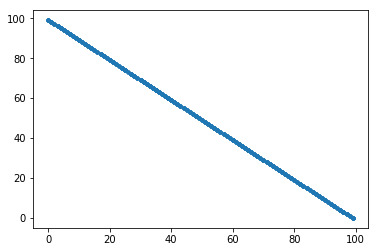

Ковариация:  -830.6204


In [178]:
I = [[0,0]]
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,I)
plot_two_samplings(R1,R2)

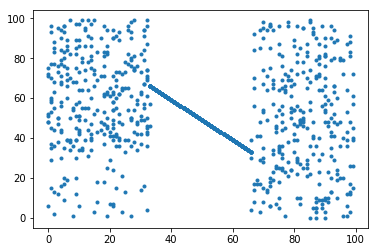

Ковариация:  -136.54202500000002


In [179]:
I = [[0,1/3], [2/3,1]]
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,I)
plot_two_samplings(R1,R2)

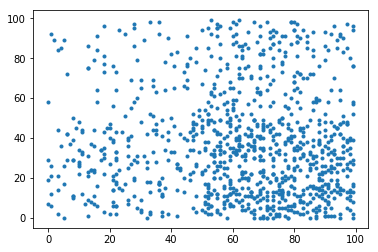

Ковариация:  -15.114231999999994


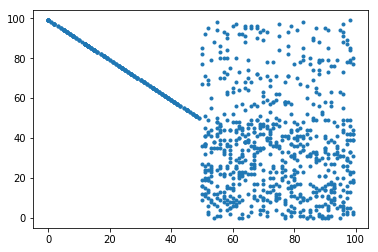

Ковариация:  -444.08038300000015


In [184]:
N = 100
K = 3 # Изменяйте это значение. Посморите, что будет меняться. 
A1 = np.arange(N)
P1 = np.array([1]*(N//2) + [K]*(N//2))
P1 =  P1 / P1.sum()
A2 = np.array(range(N-1,-1,-1))
P2 = P1

D = [[0,1]]
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,D)
plot_two_samplings(R1,R2)

D = [[1/(K+1),1]] # Обращаю внимание на 1 / (K+1). Почему так?
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,D)
plot_two_samplings(R1,R2)

## Задание 
Попробуйте реализовать две зависимые случайные величины с распределением, как на картинке.
<img src="https://raw.githubusercontent.com/samonenko/intro_to_data_maining/master/images/dist1.png">

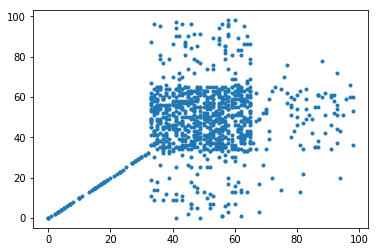

Ковариация:  93.03310200000003


In [168]:
N = 100
A1 = np.arange(N)
A2 = np.arange(N)
P1 = np.array([1]*(N//3) + [10]*(N//3) + [1]*(N//3))
P1 = P1 / P1.sum()
P2 = np.array([1]*(N//3) + [10]*(N//3) + [1]*(N//3))
P2 = P2 / P2.sum()
I = [[1/12,1]]
R1, R2 = get_dependent_samplings(A1,P1,A2,P2,I)
plot_two_samplings(R1,R2)


## Метод Монте-Карло

Поиск числа $pi$ при помощи метода Монте-Карло

In [186]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rnd

def get_pi_for_plot(n):
    X = np.empty(n)
    Y = np.empty(n)
    C = np.empty(n)
    count = 0
    S = 2*2 # Площадь квадрата со стороной 2
    for i in range(n):
        x = rnd.random()*2 - 1
        y = rnd.random()*2 - 1
        X[i] = x
        Y[i] = y
        if x**2 + y**2 <= 1:
            count+=1
            C[i] = 1
        else:
            C[i] = 0
    return S*count/n, X, Y, C

def plot_pi (N):
    my_pi, X, Y, C = get_pi_for_plot(N)
    plt.figure(N)
    plt.axis([-1,1,-1,1]);
    plt.axis('equal');
    plt.plot(X[C==1],Y[C==1],'r.');
    plt.plot(X[C==0],Y[C==0],'b.');
    plt.show();
    print('Значение PI (точное, по выборке, погрешность): {:.5}, {:.5}, {:.2}% '.format(math.pi, my_pi, relative_error(math.pi,my_pi)))


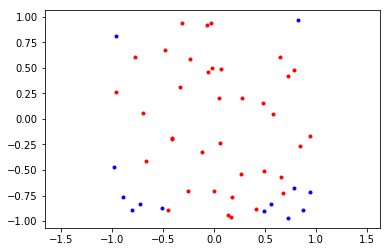

Значение PI (точное, по выборке, погрешность): 3.1416, 2.96, 6.1% 


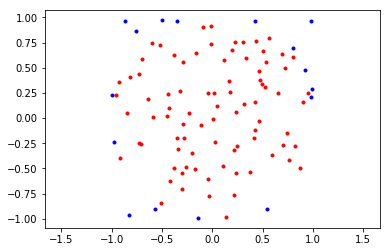

Значение PI (точное, по выборке, погрешность): 3.1416, 3.36, 6.5% 


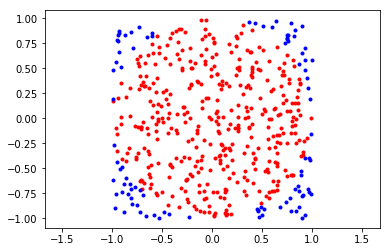

Значение PI (точное, по выборке, погрешность): 3.1416, 3.224, 2.6% 


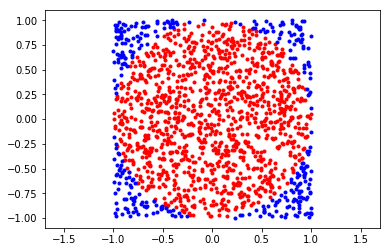

Значение PI (точное, по выборке, погрешность): 3.1416, 3.136, 0.18% 


In [4]:
plot_pi(50)
plot_pi(100)
plot_pi(500)
plot_pi(1500)

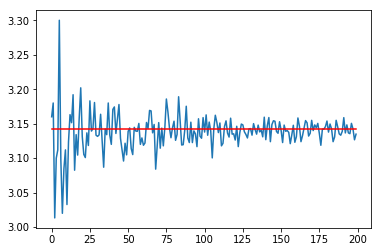

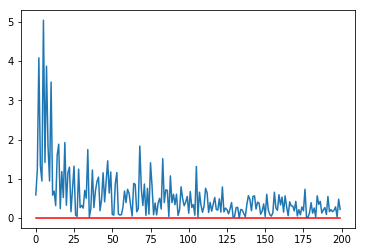

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rnd


def get_pi(n):
    count = 0
    S = 2*2 # Площадь квадрата со стороной 2
    for _ in range(n):
        x = rnd.random()*2 - 1
        y = rnd.random()*2 - 1
        if x**2 + y**2 <= 1:
            count+=1
    return S*count/n

N = 200
X = range(N)
my_pi = np.empty(N) # Найденные нами значения PI
error = np.empty(N) # Относительная ошибка измерения в процентах
for i in X:
    my_pi[i] = get_pi(100*(i+1))
    error[i] = 100*(abs(my_pi[i]- math.pi))/math.pi

plt.figure(0)
plt.plot(X,my_pi);
plt.plot(X,[math.pi]*N,'r');

plt.figure(1)
plt.plot(X,error);
plt.plot(X,[0]*N,'r');

## Задание

1. Проведите серию испытаний метода Монте-Карло для определения площади фигуры, которая ограничена синзу осью OX и сверху графиком функии $y = sin(x)$ при $0 \leq x \leq \pi$.

2. Предположите, чему равна данная площадь и постройте графики, как в предыдущем примере

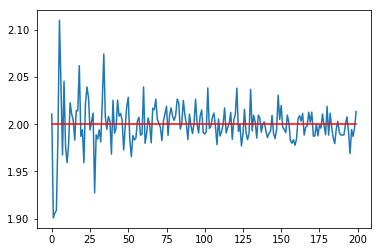

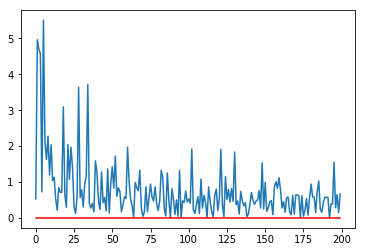

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rnd



def get_square(n):
    count = 0
    S = math.pi * 1  # Площадь квадрата со стороной 2
    for _ in range(n):
        x = rnd.random()*math.pi
        y = rnd.random()
        if math.sin(x) >= y:
            count+=1
    return S*count/n


N = 200
X = range(N)
my_square = np.empty(N) # Найденные нами значения PI
error = np.empty(N) # Относительная ошибка измерения в процентах
real_square = 2
for i in X:
    my_square[i] = get_square(100*(i+1))
    error[i] = relative_error(my_square[i], real_square)

plt.figure(0)
plt.plot(X,my_square);
plt.plot(X,[real_square]*N,'r');

plt.figure(1)
plt.plot(X,error);
plt.plot(X,[0]*N,'r');

## Центральная предельная теорема
https://ru.wikipedia.org/wiki/Центральная_предельная_теорема 

In [239]:
import scipy.stats as stats
import math

from ipywidgets import IntProgress
from IPython.display import display
import time

def sum_norm(A, P, sum_count=500):
    sum = 0
    e, s = random_variable_info(A,P)
    for i in range(sum_count):
        sum += (random_variable(A,P) )
    return (sum-e*sum_count) / (s * sum_count**0.5)
    
def central_limit_theorem(A, P, sum_count=500 ,experements_count=500):

    f = IntProgress(min=0, max=experements_count) # instantiate the bar
    display(f) # display the bar
    
    R = np.empty(experements_count)
    for i in range(experements_count):
        R[i] = sum_norm(A,P,sum_count)
        f.value += 1 # signal to increment the progress bar
        
    plt.hist(R, bins = math.floor(experements_count**0.5), density=True);
    
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) # Правило трех сигм 
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

    plt.show();

IntProgress(value=0, max=1000)

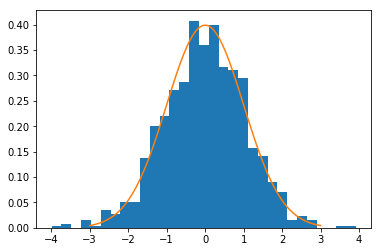

In [240]:
N = 20
A1 = np.arange(N)
P1 = np.array([1]*N)
P1 = P1 / P1.sum()

central_limit_theorem(A1, P1, 1000, 1000)

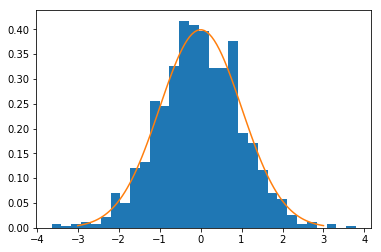

In [235]:
N = 20
A2 = np.arange(N)
P2 = np.array([i for i in range(N)])
P2 = P2 / P2.sum()

central_limit_theorem(A2, P2, 1000, 1000)

IntProgress(value=0, max=3000)

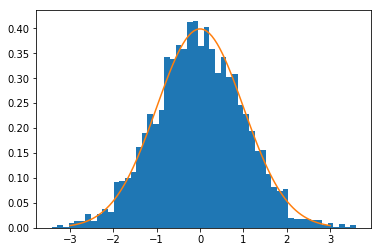

In [243]:
N = 50
A3 = np.random.rand(N)
P3 = np.random.rand(N)
P3 = P3 / P3.sum()

central_limit_theorem(A3, P3, 3000, 3000)

IntProgress(value=0)